# 1.1節　
三角ボタンをクリックすることでコードを表示，展開できる．

## 実践１
↓　実践１を展開していない状態で下の実行ボタンを押すとまとめられたセル全部を実行できる．

リスト 1.1

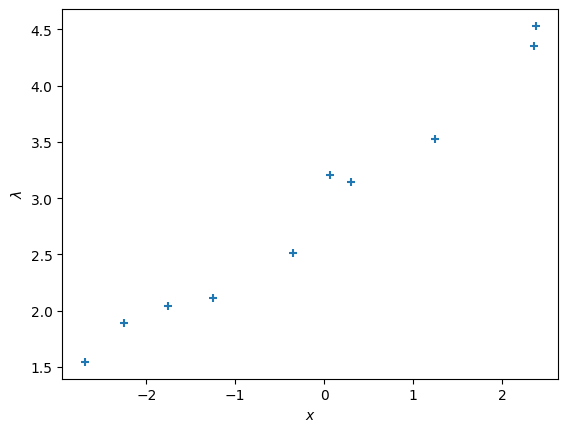

(Text(0.5, 24.0, '$x$'), Text(25.000000000000007, 0.5, '$\\lambda$'), None)

In [1]:
import matplotlib.pyplot as plt, numpy as np

a0, a1 = 3, 0.5

np.random.seed(3)
n = 10 
x_data = 6*np.random.rand(n) - 3 
lam_data = a1*x_data + a0 + np.random.normal(0, 0.2, n)

fig, ax = plt.subplots()
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$\lambda$'), plt.show()

リスト 1.2

In [2]:
X_data = np.stack((np.ones(n), x_data), 1)
c = np.linalg.pinv(X_data) @ lam_data

リスト 1.3

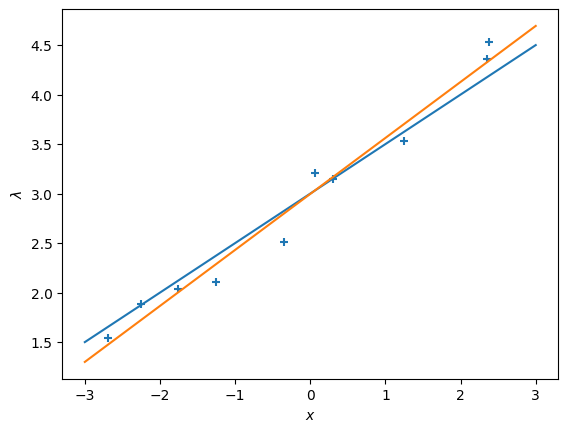

(Text(0.5, 24.0, '$x$'), Text(25.000000000000007, 0.5, '$\\lambda$'), None)

In [3]:
x = np.linspace(-3, 3, 100)
lam = a1*x + a0
lam_sol = c[1]*x + c[0]

fig, ax = plt.subplots()
ax.plot(x, lam), ax.plot(x, lam_sol)
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$\lambda$'), plt.show()

## 実践２

In [4]:
import matplotlib.pyplot as plt, numpy as np

リスト 1.4

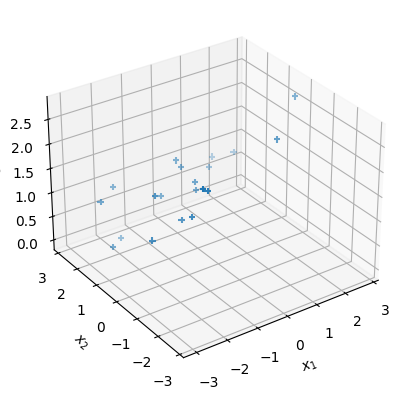

(None, None)

In [5]:
a0, a1, a2 = 2, 0.3, -0.5

np.random.seed(1)
n = 20 
x_data = 6*np.random.rand(n,2) - 3
lam_data = a2*x_data[:,1] + a1*x_data[:,0] + a0 + np.random.normal(0, 0.5, n)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x_data[:,0], x_data[:,1], lam_data, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\lambda$')
ax.view_init(azim=235), plt.show()

リスト 1.5

In [6]:
X_data = np.stack((np.ones(n), x_data[:,0], x_data[:,1]), 1)
c = np.linalg.pinv(X_data) @ lam_data

リスト 1.6

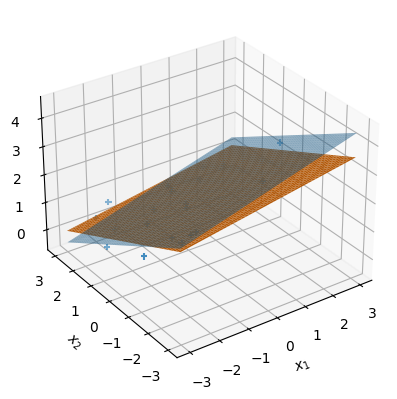

(None, None)

In [7]:
x1 = x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Lam = a2*X[:,1] + a1*X[:,0] + a0
lam = Lam.reshape(X1.shape)
Lam_sol = c[2]*X[:,1] + c[1]*X[:,0] + c[0]
lam_sol = Lam_sol.reshape(X1.shape)

fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, lam, alpha=0.5)
surf = ax.plot_surface(X1, X2, lam_sol)
ax.scatter(x_data[:,0], x_data[:,1], lam_data, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\lambda$')
ax.view_init(azim=235), plt.show()

# 1.2節

## 実践３

In [8]:
import matplotlib.pyplot as plt, numpy as np

リスト 1.7

In [9]:
np.random.seed(0)
n = 30
x1_data = -5 + 10*np.random.rand(n)
x2_data = -5 + 10*np.random.rand(n)
lam_data = np.empty(0)
D_plus = D_minus = np.empty(0)

for i in range(n):
  if x1_data[i] >= 1.5*x2_data[i]:
    D_plus = np.append(D_plus, [x1_data[i], x2_data[i]])
    lam_data = np.append(lam_data, 1)
  else:
    D_minus = np.append(D_minus, [x1_data[i], x2_data[i]])
    lam_data = np.append(lam_data, -1)
D_plus = D_plus.reshape(-1,2).T
D_minus = D_minus.reshape(-1,2).T

リスト 1.8

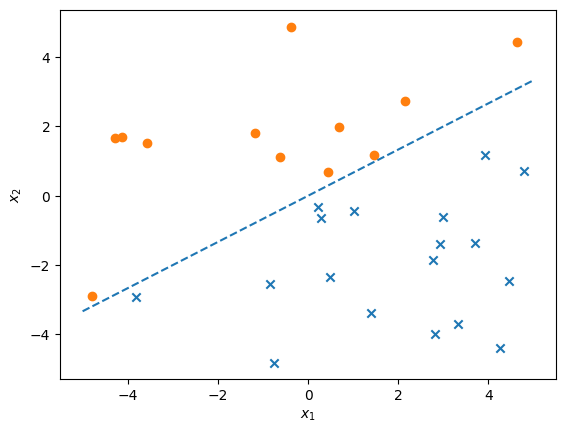

(Text(0.5, 24.4, '$x_1$'), Text(24.400000000000013, 0.5, '$x_2$'), None)

In [10]:
x1 = np.linspace(-5, 5, 100) 
x2 = (1/1.5)*x1

fig, ax = plt.subplots()
ax.scatter(D_plus[0], D_plus[1], marker='x')
ax.scatter(D_minus[0], D_minus[1], marker='o')
ax.plot(x1, x2, ls='--')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

リスト 1.9

In [11]:
import cvxpy as cp

c = cp.Variable(3)
H = np.diag([2,2,0])
A = np.diag(lam_data) @ np.vstack((x1_data, x2_data, np.ones(n))).T
b = np.ones(n)
cons = [A @ c >= b]
obj = cp.Minimize(cp.quad_form(c, H))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

26.6849911459815

リスト 1.10

In [12]:
c = c.value
cons = A @ c - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv = np.array([x1_data[sv_index], x2_data[sv_index]])

リスト 1.11

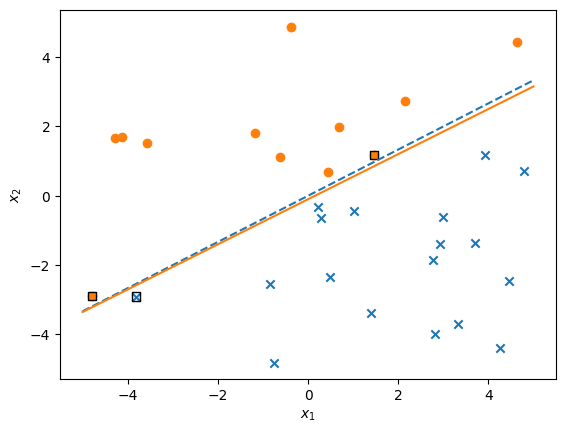

(Text(0.5, 24.4, '$x_1$'), Text(24.400000000000013, 0.5, '$x_2$'), None)

In [13]:
x2_sol = -(c[0]/c[1])*x1 - (c[2]/c[1])

fig, ax = plt.subplots()
ax.plot(x1, x2, ls='--'), ax.plot(x1, x2_sol)
ax.scatter(D_plus[0], D_plus[1], marker='x')
ax.scatter(D_minus[0], D_minus[1], marker='o')
ax.scatter(sv[0], sv[1], marker='s', color='k', fc='none')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

# 1.3節

In [14]:
import matplotlib.pyplot as plt, numpy as np

リスト 1.12

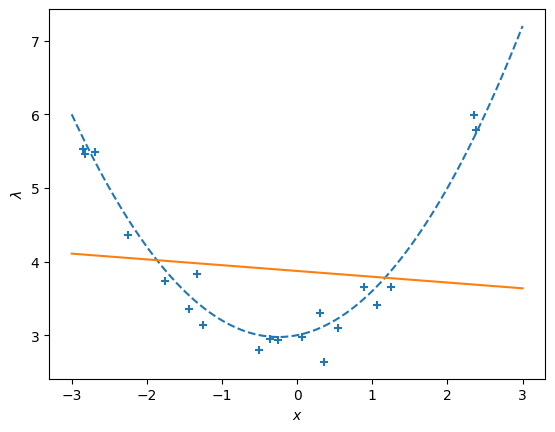

(Text(0.5, 24.0, '$x$'), Text(25.000000000000007, 0.5, '$\\lambda$'), None)

In [15]:
np.random.seed(3)
n = 20 
x_data = 6*np.random.rand(n) - 3 
lam_data = 0.4*x_data**2 + 0.2*x_data + 3 + np.random.normal(0, 0.2, n)

X_data = np.stack((np.ones(n), x_data), 1)
c = np.linalg.pinv(X_data) @ lam_data

x = np.linspace(-3, 3, 100)
lam = 0.4*x**2 + 0.2*x + 3
lam_sol = c[1]*x + c[0]

fig, ax = plt.subplots()
ax.plot(x, lam, ls='--'), ax.plot(x, lam_sol)
ax.scatter(x_data, lam_data, marker='+')
plt.xlabel('$x$'), plt.ylabel('$\lambda$'), plt.show()